<a href="https://colab.research.google.com/github/Vidyagowda0628/20221COM0108/blob/main/labsheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#PLOT UTILITIES

In [ ]:
def plot_series(time,series,format="-",start =0,end=None,label=None):
  plt.figure(figsize=(10,6))
  plt.plot(time[start:end],series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14, labels=label)
  plt.grid(True)
  plt.show()

In [ ]:
def trend(time,slope=0):
  series=slope*time
  return series

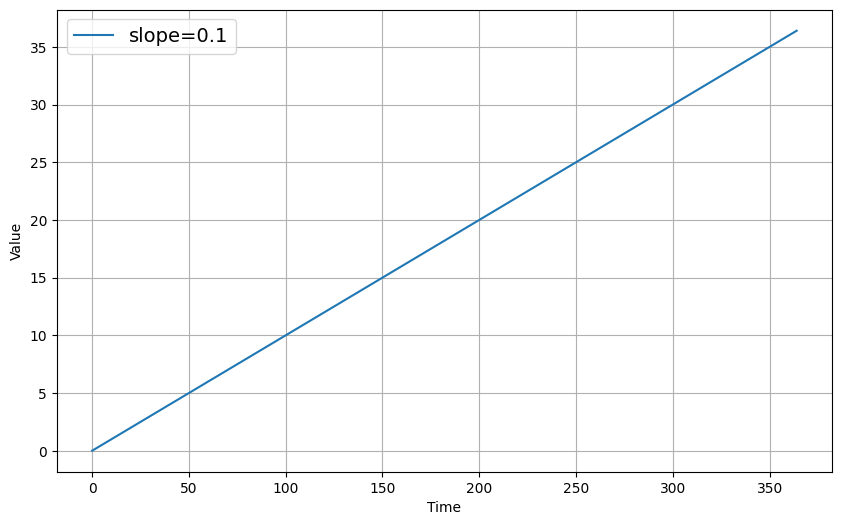

In [ ]:
time=np.arange(365)
slope=0.1
series = trend(time,slope)
plot_series(time,series,label=[f'slope={slope}'])

In [ ]:
def seasonal_pattern(season_time):
  data_pattern=np.where(season_time<0.4,
                        np.cos(season_time*2*np.pi),
                        1/np.exp(3*season_time))
  return data_pattern

def seasonality(time,period,amplitude=1,phase=0):
  season_time=((time+phase)%period)/period
  data_pattern=amplitude*seasonal_pattern(season_time)
  return data_pattern

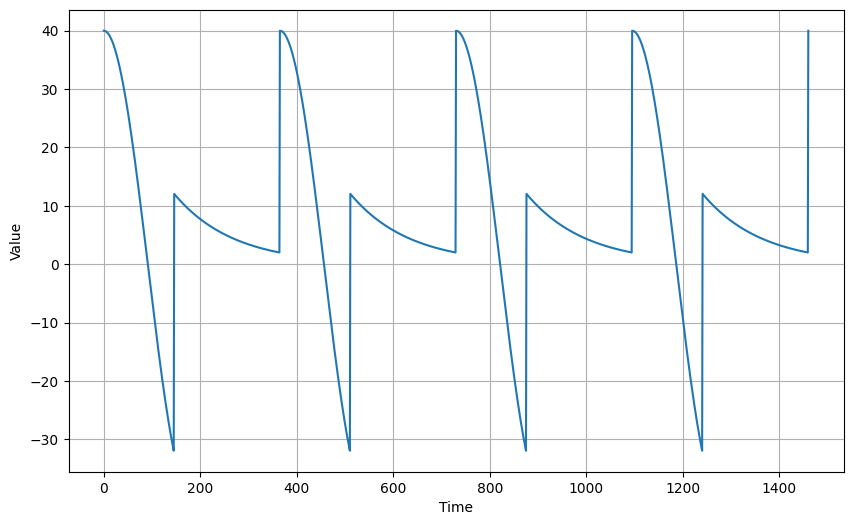

In [ ]:
time=np.arange(4*365+1)
period=365
amplitude=40
series=seasonality(time,period=period,amplitude=amplitude)
plot_series(time,series)

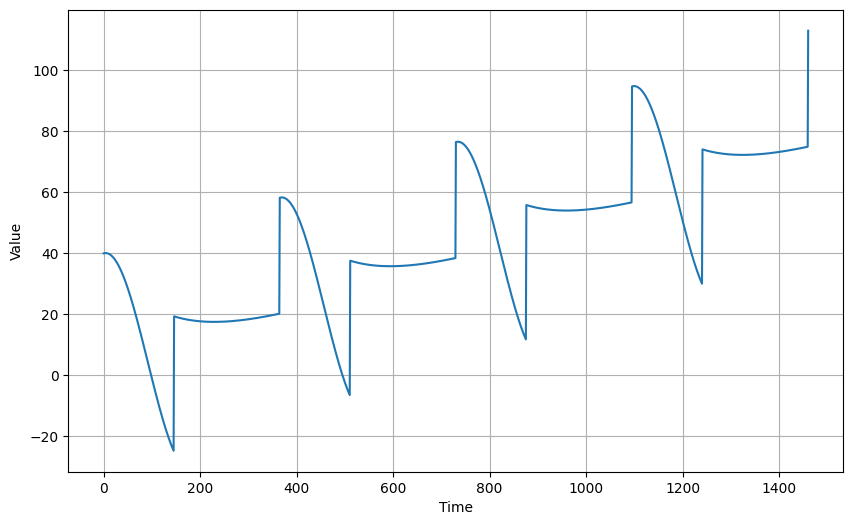

In [ ]:
slope=0.05
period=365
amplitude=40
series = trend(time,slope)+ seasonality(time, period=period,amplitude=amplitude)
plot_series(time,series)

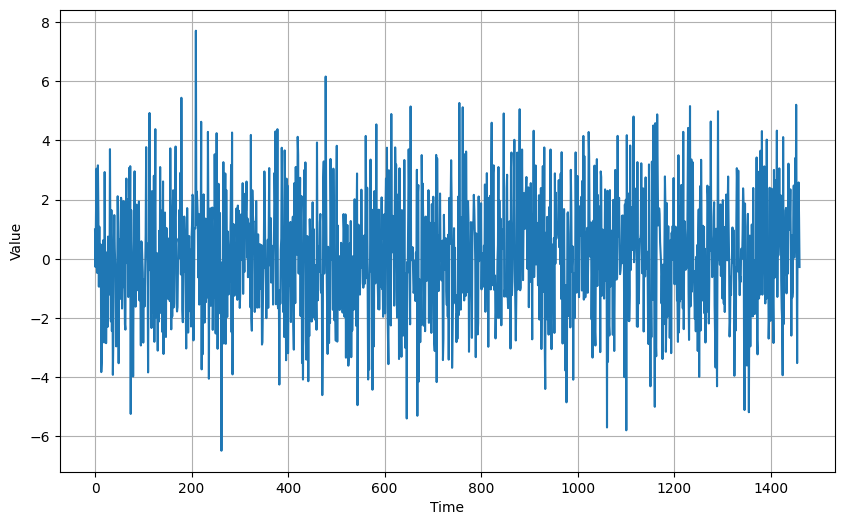

In [ ]:
def noise(time, noise_level=1, seed=None):
  rnd=np.random.RandomState(seed)
  noise=rnd.randn(len(time))*noise_level
  return noise
noise_level=2
noise_signal= noise(time,noise_level=noise_level, seed=42)
plot_series(time,noise_signal)

In [ ]:
def autocorrelation(time, amplitude,seed=None):
  rnd=np.random.RandomState(seed)
  ar=rnd.randn(len(time)+50)
  ar[:50] =100
  phi1=0.5
  phi2=-0.1
  for step in range(50, len(time)+50):
    ar[step]+= phi1*ar[step-50]
    ar[step]+= phi2*ar[step-33]
    ar=ar[50:]*amplitude
    return ar

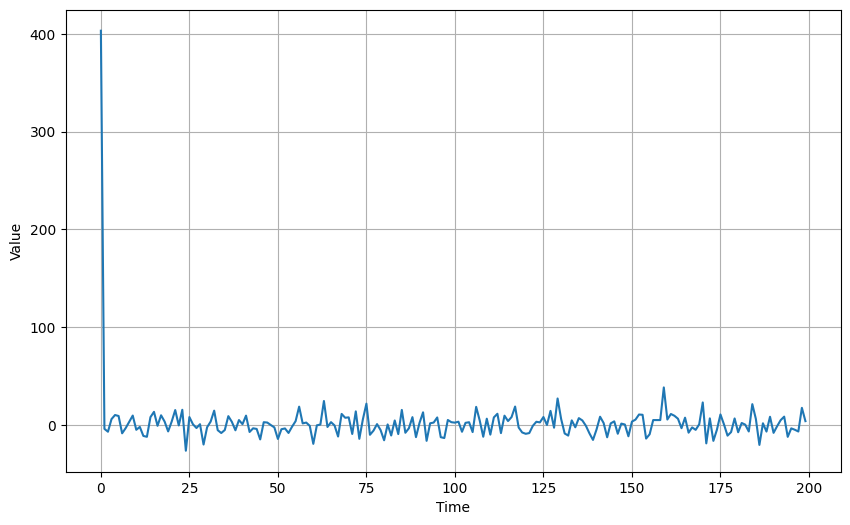

In [ ]:
 series= autocorrelation(time,amplitude=10, seed=42)
 plot_series(time[:200], series[:200])

In [ ]:
def autocorrelation(time,amplitude,seed=None):
  rnd=np.random.RandomState(seed)
  ar=rnd.randn(len(time)+1)
  phi=0.8
  for step in range(1,len(time)+1):
    ar[step]+=phi*ar[step-1]
  ar=ar[1:]* amplitude
  return ar


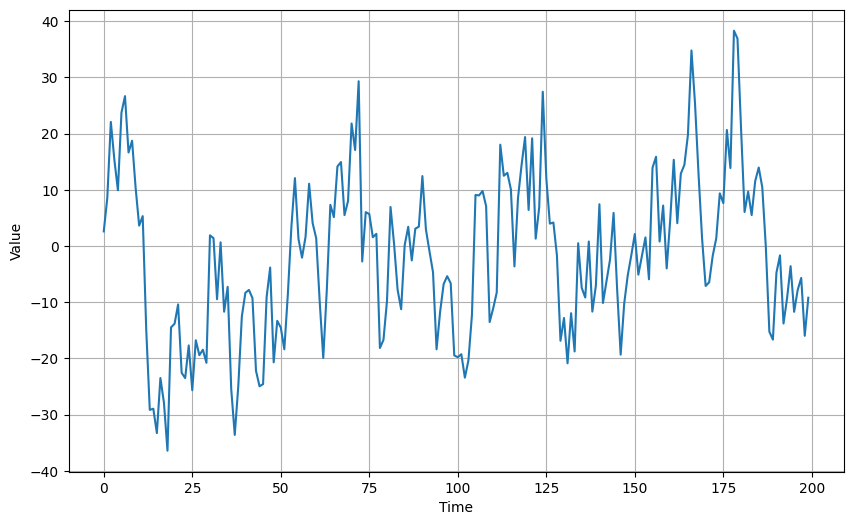

In [ ]:
series = autocorrelation(time,amplitude=10, seed=42)
plot_series(time[:200], series[:200])